# Определение факторов, определяющих успешность игры.

  <font size="3"><b>Цель проекта</b></font>

Интернет-магазину «Стримчик», продающему по всему миру компьютерные игры требуется спланировать рекламные кампании и определить потенциально популярные игры. Из открытых источников собраны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Для решения поставленой задачи необходимо выявить определяющие успешность игры закономерности.

## Шаг 1. Изучение общей информации

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
import numpy as np
import warnings
pd.set_option('chained_assignment', None)
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('C:\\Users\\admin\\Desktop\\DS_yandex\\04_Определение факторов, определяющих успешность игры\\games.csv')
display(data.head())
data.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Исследуемый датасет состоит из следующих столбцов:
1. Name — название игры
2. Platform — платформа
3. Year_of_Release — год выпуска
4. Genre — жанр игры
5. NA_sales — продажи в Северной Америке (миллионы проданных копий)
6. EU_sales — продажи в Европе (миллионы проданных копий)
7. JP_sales — продажи в Японии (миллионы проданных копий)
8. Other_sales — продажи в других странах (миллионы проданных копий)
9. Critic_Score — оценка критиков (максимум 100)
10. User_Score — оценка пользователей (максимум 10)
11. Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Необходимо заменить названия столбцов - привести их к нижнему регистру. 

Заменить тип данных в столбцах 'Year_of_Release' и 'User_Score'.

In [3]:
data['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

## Шаг 2. Подготовка данных

### Замена названия столбцов (приведение к нижнему регистру)

In [4]:
data.set_axis([x.lower() for x in data.columns.to_list()], axis = 'columns', inplace = True)
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [5]:
data['platform'] = data['platform'].str.lower()

Так же перевели все названия платформ в нижний регистр.

### Обработка пропусков и преобразование данных в нужные типы

In [6]:
data.dropna(subset = ['name'], inplace = True)

Избавились от строк с пропусками в столбце 'name'.

In [7]:
d = {}
for i in list(data.query('year_of_release.isna()')['name'].unique()):
    if data.query('name == @i and year_of_release.notna()')['year_of_release'].median()\
    == data.query('name == @i and year_of_release.notna()')['year_of_release'].mean() and \
        data.query('name == @i and year_of_release.notna()')['year_of_release'].median() % 1 == 0:
        d[i] = data.query('name == @i and year_of_release.notna()')['year_of_release'].median()
for i in d:
    if d[i] > 0:
        for j in list(data[data['name'] == i].index):
            if (data.loc[j, 'year_of_release'] != d[i]):
                data.loc[j, 'year_of_release'] = d[i]

In [9]:
data = data.query('year_of_release.notna()')
data['year_of_release'] = data['year_of_release'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16556 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16556 non-null  object 
 1   platform         16556 non-null  object 
 2   year_of_release  16556 non-null  int32  
 3   genre            16556 non-null  object 
 4   na_sales         16556 non-null  float64
 5   eu_sales         16556 non-null  float64
 6   jp_sales         16556 non-null  float64
 7   other_sales      16556 non-null  float64
 8   critic_score     8069 non-null   float64
 9   user_score       9927 non-null   object 
 10  rating           9861 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.5+ MB


Заполнили пропуски в столбце 'year_of_release' у тех игр, которые выходили на разных платформах в один год. Строки, в которых эти данные заполнить не получилось - удалили, их было менее 1% от датасета.
Весь столбец затем перевели в целочисленный формат.

In [10]:
data['user_score'] = data['user_score'].where(data['user_score'] != 'tbd')
data['user_score'] = data['user_score'].astype(float)

В столбце 'user_score' присутствовали значения **tbd**(To Be Determined, то есть "Будет определено"), очевидно на момент сбора информации по этой игре рейтинг только формировался. Эти значения удалили, оставив на их месте **nan**, после чего данные столбца преобразовали в числовой формат(float).

Заполнить пропуски в 'critic_score', 'user_score' и 'rating' не представляется возможным, потому оценки субъективны, а для восстановления рейтинга не хватает данных.

### Подсчет суммарных продаж во всех регионах и занесение их в отдельный столбец

In [11]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

Занесли суммарные продажи в отдельный столбец 'total_sales'

## Шаг 3. Исследовательский анализ данных

Узнаем, сколько игр выпускалось в разные годы.

<AxesSubplot:xlabel='year_of_release'>

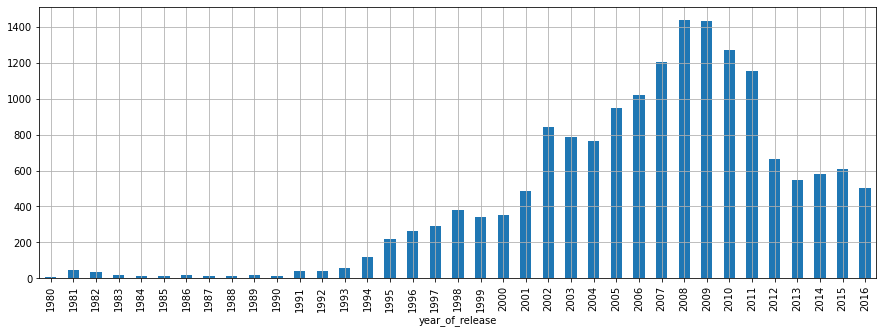

In [12]:
data.groupby('year_of_release')['name'].count().plot(kind = 'bar', figsize = (15,5) ,grid = True)

Судя по графику, количество выпускаемых игр начало увеличиваться с начала 90-х годов, достигнув пика в конце 2000-х. Затем резкое падение практически в 2 раза в с 2011 на 2012 год, после чего значение держится примерно на одном уровне.
Для выявления выявления факторов, определяющих успех игр, нам нужны данные не за весь период существования индустрии, а только за ближайшее прошлое. Определением полезного для нас отрезка прошлого сейчас и займемся.

Посчитаем суммарные продажи для каждой платформы и отберем платформы с наибольшими суммарными продажами.

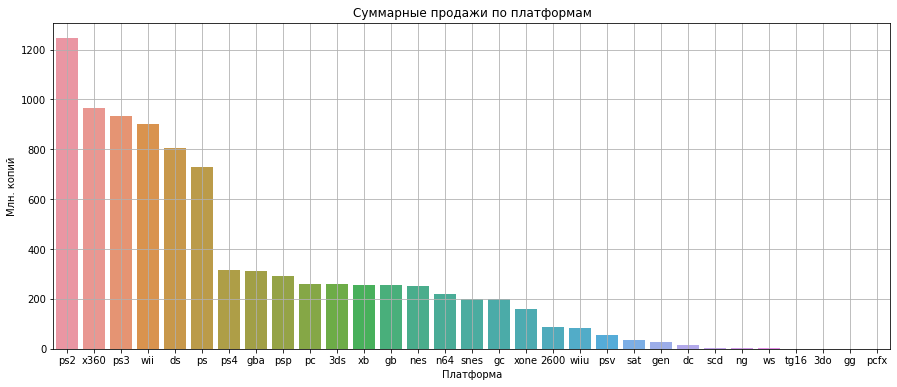

In [13]:
top = data.groupby('platform')['total_sales'].sum().sort_values(ascending = False).reset_index()
plt.figure(figsize=(15, 6))
sns.barplot(x="platform", y="total_sales", data=top)
plt.xlabel('Платформа')
plt.ylabel('Млн. копий')
plt.title('Суммарные продажи по платформам')
plt.grid(True)
plt.show()

Сильно выделяются первые 6 платформ, их и выберем для анализа.

In [14]:
top = top.head(6)

Посмотрим на график распределения продаж для отобранных платформ и определим по нему среднее время жизни платформы.

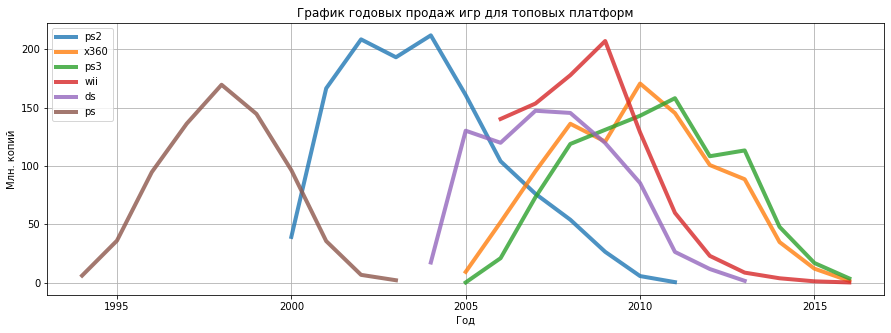

In [15]:
data = data.drop(15957, axis = 'index') # Удалим строку с ошибкой, которая помешает анализу
act_plat = list(top['platform'].unique())
plt.figure(figsize=(15, 5))
for i in list(top['platform'].unique()):
    plt.plot(data.query('platform == @i').groupby('year_of_release')['total_sales'].sum(), 
                alpha=0.8, linewidth = 4, label = i)
plt.xlabel('Год')
plt.ylabel('Млн. копий')
plt.xlim(1993, 2017)
plt.title('График годовых продаж игр для топовых платформ')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

Прибегнем к помощи рассчетов средней времени жизни платформ

In [16]:
def plat_liv(n):
    pl = pd.DataFrame(list(data.groupby('platform')['total_sales'].sum().sort_values(ascending = False).reset_index().head(n).platform.unique()), columns = ['platform'])
    c = 0
    for i in list(pl['platform'].unique()):
        pl.loc[c, 'start'] = int(data.query('platform == @i')['year_of_release'].min())
        pl.loc[c, 'end'] = int(data.query('platform == @i')['year_of_release'].max())
        pl.loc[c, 'lifetime'] = pl.loc[c, 'end'] - pl.loc[c, 'start']
        c +=1
    print('Среднее время жизни платформы -', round(pl.query('end < 2016')['lifetime'].mean(), 1), 'лет.')
plat_liv(6)

Среднее время жизни платформы - 9.7 лет.


Получается, что среднее время жизни платформы чуть меньше 10 лет. Исключением является платформа PC по понятным причинам. Для удобства округлим до 10 лет.

Исходя из того, что необходимо построить прогноз на 2017 год, для анализа можно было бы использовать только данные с 2007 года. Однако принимая во внимание резкое изменение на рынке в количестве выпускаемых игр в 2012 году, возьмем для дальнейшего анализа период именно с 2012 года

In [17]:
data = data.query('year_of_release >= 2012')

Теперь рассмотрим продажи в выбранном временном отрезке.

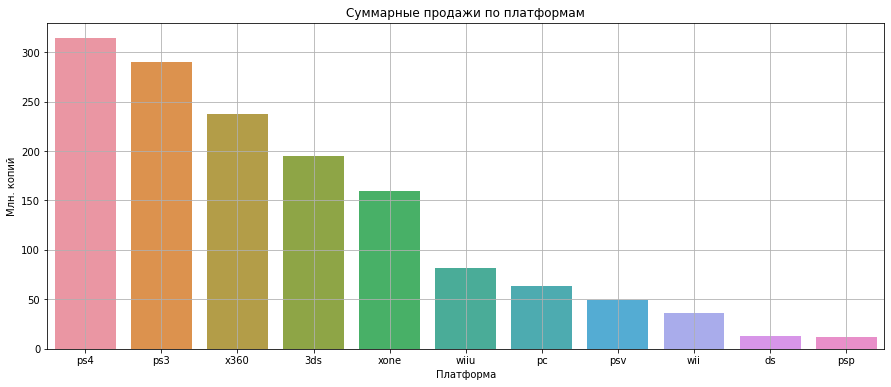

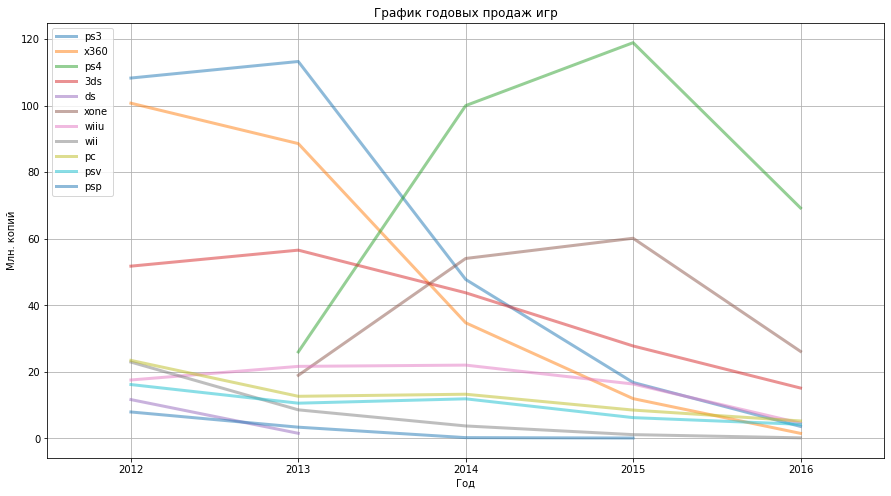

In [18]:
plt.figure(figsize=(15, 6))
sns.barplot(x="platform", y="total_sales", data=data.groupby('platform')['total_sales'].sum()\
            .sort_values(ascending = False).reset_index())
plt.xlabel('Платформа')
plt.ylabel('Млн. копий')
plt.title('Суммарные продажи по платформам')
plt.grid(True)
plt.show()
plt.figure(figsize=(15, 8))
for i in list(data['platform'].unique()):
    plt.plot(data.query('platform == @i').groupby('year_of_release')['total_sales'].sum(), 
                alpha=0.5, linewidth = 3, label = i)
plt.xlabel('Год')
plt.ylabel('Млн. копий')
plt.xlim(2011.5, 2016.5)
plt.title('График годовых продаж игр')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

Явными лидерами по продажам являются платформы **ps4**, **ps3**, **x360**, **3ds** и **xone**. Однако стоит отметить, что PS3 и X360 уже являются устаревшими платформами, продажи по которым уже сходят на нет(и заканчивается жизненный цикл) и которые уже получили обновление в виде PS4 и Xone. 

Исходя из графиков, наиболее перспективными на 2017 год выглядят 3 платформы: **ps4**, **xone** и **3ds**.

Построим график "ящик с усами" по глобальным продажам игр по каждой из этих платформ.

Количество выпущенных игр для платформы ps4 равно 392
Количество выпущенных игр для платформы xone равно 247
Количество выпущенных игр для платформы 3ds равно 397


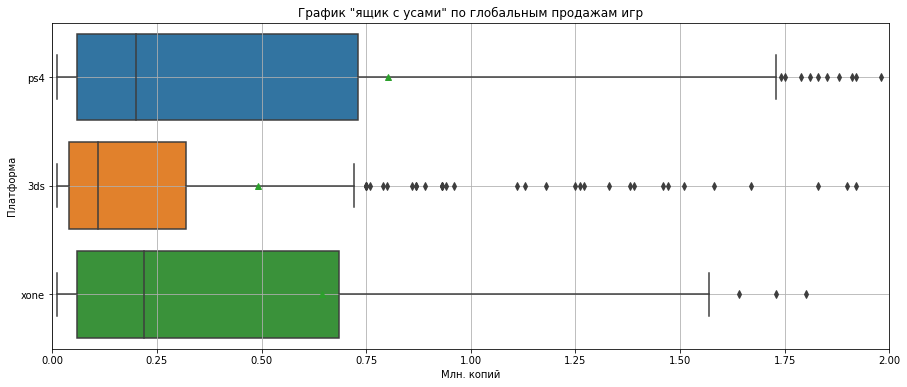

In [19]:
pers_platf = ['ps4', 'xone', '3ds']
plt.figure(figsize=(15, 6))
ax = sns.boxplot(y="platform", x="total_sales", data = data.query('platform.isin(@pers_platf)'), showmeans=True, orient='h')
plt.xlim(0, 2)
plt.ylabel('Платформа')
plt.xlabel('Млн. копий')
plt.title('График "ящик с усами" по глобальным продажам игр')
plt.grid(True)
for i in pers_platf:
    print('Количество выпущенных игр для платформы', i, 'равно', data.query('platform == @i')['name'].count())

Опираясь на график, можно сказать, что платформы **ps4** и **xone** более популярны у игроков, чем на **3ds**. Это можно объяснить тем, что **ps4** и **xone** более молодые платформы, а значит технически более совершенные, что отражается на качествеи визуале игр. Отсюда и преимущество перед **3ds** практически в 2 раза.
Лидером по количеству игр с высокими продажами является **ps4**.

Рассмотрим влияние отзывов критиков и пользователей на продажи на примере одной платформы.

In [20]:
def graf_f(plat):
    fig, ax = plt.subplots(1, 2, figsize=(17, 6))
    ax[0].scatter(y = data.query('platform == @plat')['total_sales'], x = data.query('platform == @plat')['critic_score'])
    ax[0].set_xlabel("Количество проданных копий игр (млн.)")
    ax[0].set_ylabel("Оценка критиков")

    ax[1].scatter(y = data.query('platform == @plat')['total_sales'], x = data.query('platform == @plat')['user_score'])
    ax[1].set_xlabel("Количество проданных копий игр (млн.)")
    ax[1].set_ylabel("Оценка пользователей")
def corr_f(plat):
    print(' Корреляция между оценками критиков и продажами для платформы', plat, 'составляет:', 
          round(data.query('platform == @plat and critic_score != "nan"')['total_sales']\
                .corr(data.query('platform == @plat and critic_score != "nan"')['critic_score']), 3), '\n',
          'Корреляция между оценками пользователями и продажами для платформы', plat, 'составляет:',
          round(data.query('platform == @plat and user_score != "nan"')['total_sales']\
                .corr(data.query('platform == @plat and user_score != "nan"')['user_score']), 3))

 Корреляция между оценками критиков и продажами для платформы ps4 составляет: 0.407 
 Корреляция между оценками пользователями и продажами для платформы ps4 составляет: -0.032


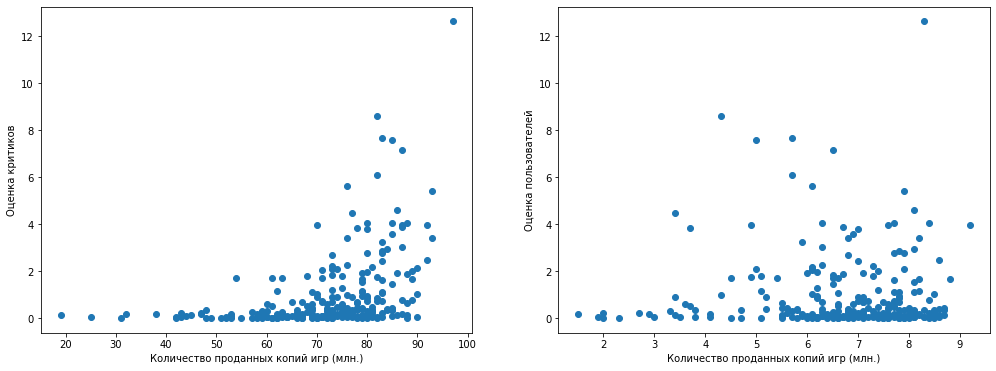

In [21]:
corr_f('ps4')
graf_f('ps4')

Есть не очень сильная, но явно выраженная зависимость между оценками критиков и количеством проданных копий, коэффициент корреляции этих величин: 0,407. Взаимосвязи же между оценками пользователей и продажами не наблюдается, коэффициент корреляции: -0,032. 
Такое положение дел можно объяснить тем, что оценки пользователей основываются на личных предпочтениях и очень субъективны, а критики оценивают игры по определенным критериям, максимально объективно.

Проверим эти выводы на других платформах.

 Корреляция между оценками критиков и продажами для платформы xone составляет: 0.417 
 Корреляция между оценками пользователями и продажами для платформы xone составляет: -0.069


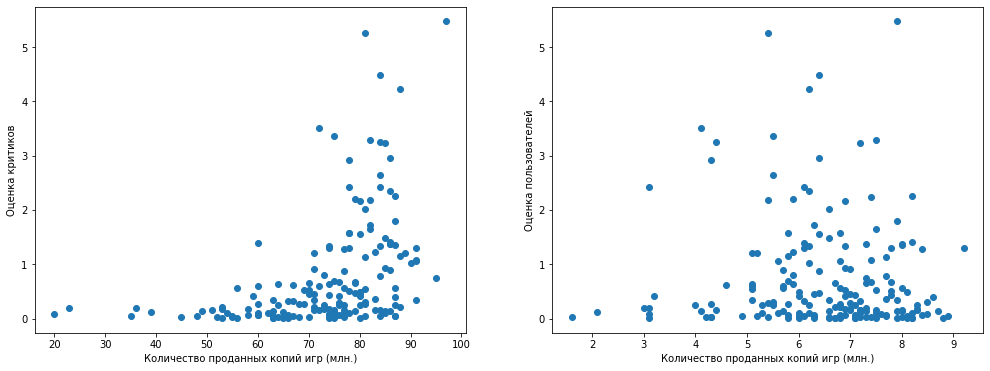

In [22]:
corr_f('xone')
graf_f('xone')

 Корреляция между оценками критиков и продажами для платформы ps3 составляет: 0.331 
 Корреляция между оценками пользователями и продажами для платформы ps3 составляет: -0.005


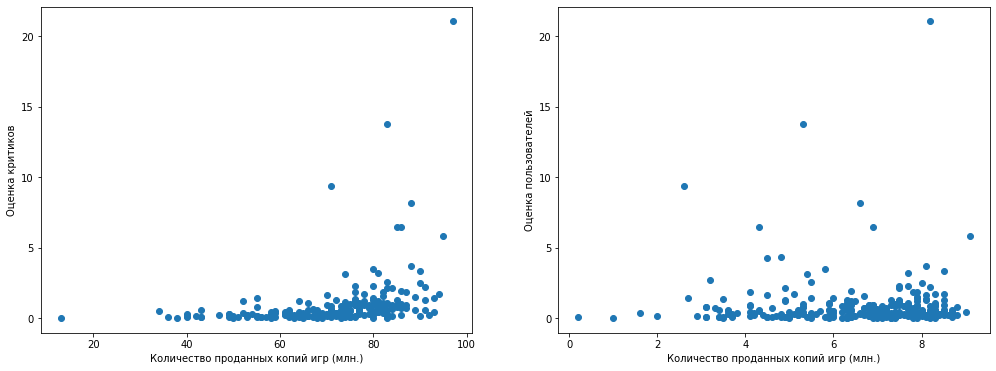

In [23]:
corr_f('ps3')
graf_f('ps3')

 Корреляция между оценками критиков и продажами для платформы x360 составляет: 0.36 
 Корреляция между оценками пользователями и продажами для платформы x360 составляет: 0.006


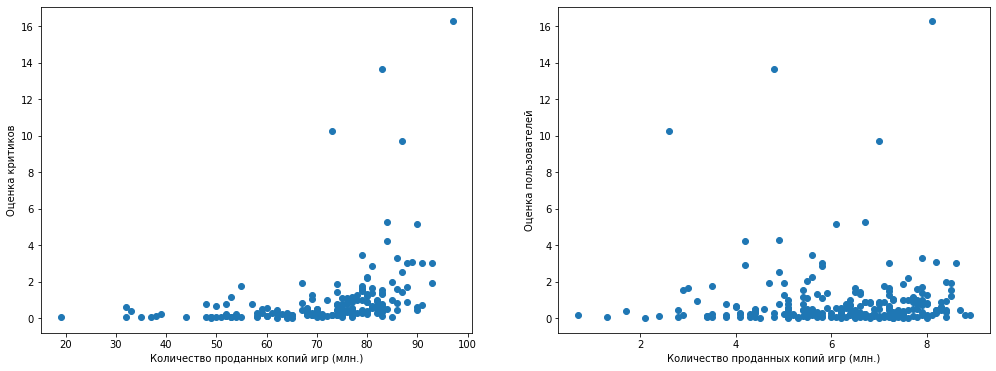

In [24]:
corr_f('x360')
graf_f('x360')

Выводы подтверждаются при анализе других платформ. Поэтому при анализе успешности игр необходимо принимать во внимание оценку критиков.

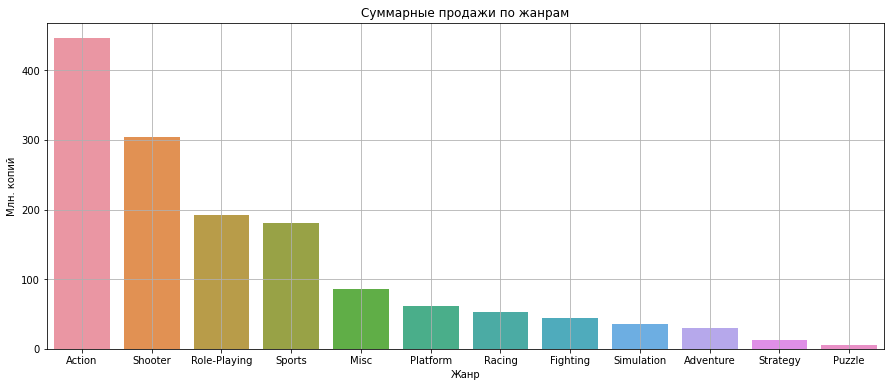

In [25]:
plt.figure(figsize=(15, 6))
sns.barplot(x='genre', y='total_sales', data=data.groupby('genre')['total_sales'].sum().sort_values(ascending = False).reset_index())
plt.xlabel('Жанр')
plt.ylabel('Млн. копий')
plt.title('Суммарные продажи по жанрам')
plt.grid(True)
plt.show()

По суммарным продажам можно выделить 5 лидеров: 
1. **Action**; 
2. **Shooter**; 
3. **Role-Playing**;
4. **Sports**; 
5. **Misc**. 

Причем **Action** обходит жанр **Shooter** практически на треть. В лидерах 2 жанра, которым свойственна динамика и активный геймплей. Так же этим жанрам свойственен низкий порог входа в игру, игровой процесс достаточно прост и интуитивно понятен игроку. Именно на эти свойства игр необходимо обратить внимание при выделении факторов, влияющих на успешность игры. 

## Шаг 4. Выделение портрета пользователя каждого региона.

Необходимо определить для пользователя каждого региона (NA, EU, JP) следующее:

* ### cамые популярные платформы (топ-5);

In [26]:
def top_5(reg, par):
    reg = reg.lower() + '_sales'
    dr = {'na_sales':'Северной Америке', 'eu_sales':'Европе', 'jp_sales':'Японии'}
    dp = {'platform':['Платформа', 'платформам'], 'genre':['Жанр', 'жанрам'], 'rating':['Рейтинг ESRB', 'рейтингам ESRB']}
    plt.figure(figsize=(15, 6))
    sns.barplot(x=par, y=reg, data=data.groupby(par)[reg].sum().sort_values(ascending = False).reset_index())
    plt.xlabel(dp[par][0])
    plt.ylabel('Млн. копий')
    plt.title('Суммарные продажи по ' + dp[par][1] + ' в ' + dr[reg])
    plt.grid(True)
    plt.show()
    plt.figure(figsize=(15, 8))
    for i in list(data[par].unique()):
        if par == 'platform':
            plt.plot(data.query('platform == @i').groupby('year_of_release')[reg].sum(), alpha=0.6, linewidth = 3, label = i)
        elif par == 'genre':
            plt.plot(data.query('genre == @i').groupby('year_of_release')[reg].sum(), alpha=0.6, linewidth = 3, label = i)
        elif par == 'rating':
            plt.plot(data.query('rating == @i').groupby('year_of_release')[reg].sum(), alpha=0.6, linewidth = 3, label = i)
    plt.xlabel('Год')
    plt.ylabel('Млн. копий')
    plt.xlim(2011.5, 2016.1)
    plt.title('График годовых продаж игр по ' + dp[par][1] + ' в ' + dr[reg])
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

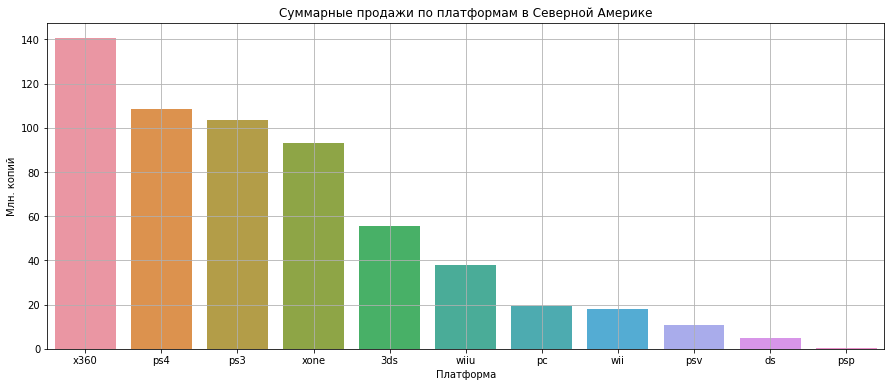

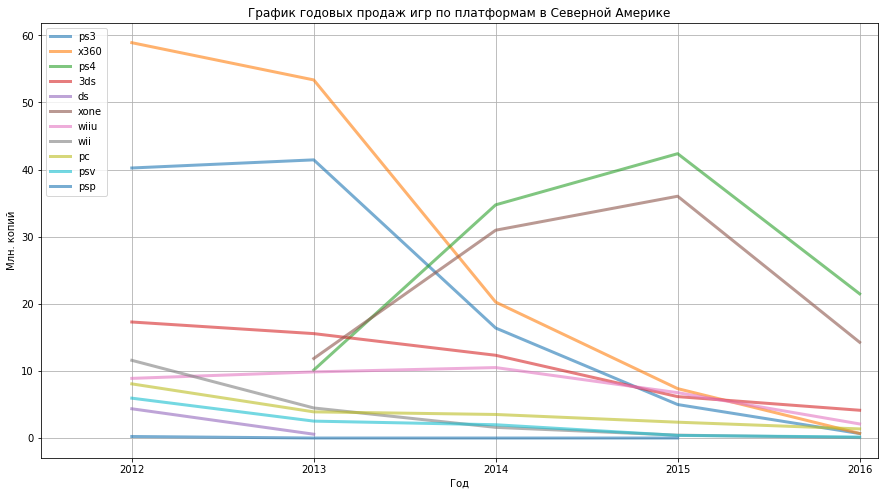

In [27]:
top_5('NA', 'platform')

За выбранный актуальный период времени в Северной Америке явным лидером является платформа **x360**, практически на 20% опережая платформу **ps4**. На 3 месте с небольшим отставанием расположилась платформа **ps3**. Четвертое место за **xone**. На пятом месте с отставанием более, чем в 2 раза расположилась **3ds**.

В северной америке очень сильны позиции платформ **PlayStation** и **Xbox**, причем **PlayStation** лидирует. Лидерство по ежегодным продажам платформы старого поколения сразу же передают платформам нового поколения. Как итог: наиболее перспективными на 2017 год являются **ps4** и **xone**.

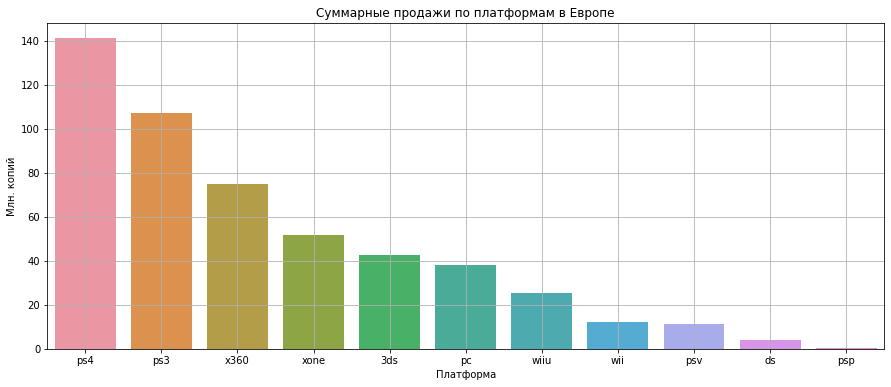

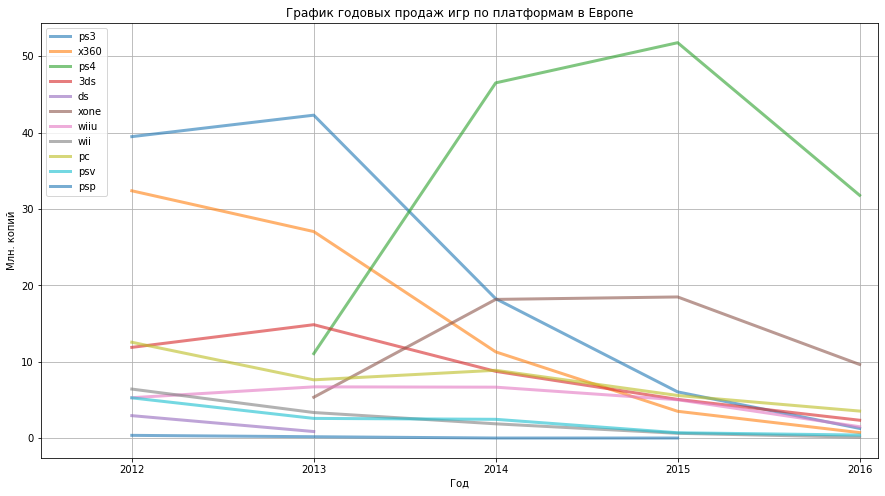

In [28]:
top_5('EU', 'platform')

В Европе лидером по проданным играм является платформа **ps4**, на втором и третьем месте расположились **ps3** и **x360** соответственно. На четвертом и пятом местах **xone** и **3ds**.

В Европе так же, как и в Северной Америке, очень наиболее популярны платформы **PlayStation** и **Xbox**. Отличие только в том, что платформа **PlayStation** имеет огромное преимущество перед **Xbox**, что видно на графике годовых продаж. Итог: на 2017 год в Европе наиболее перспективна **ps4**. За ней, сильно отставая, - **xone**.

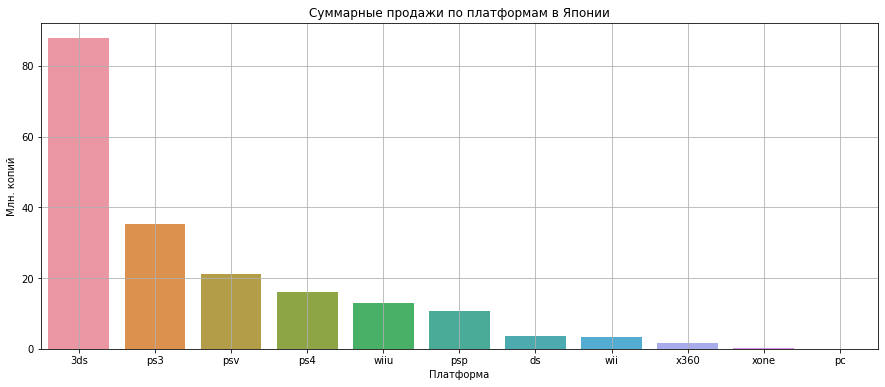

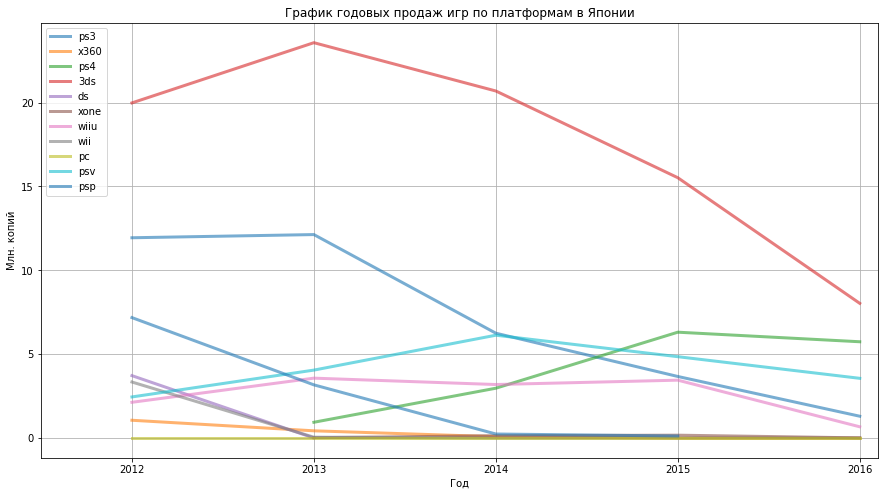

In [29]:
top_5('JP', 'platform')

В Японии на первом месте находится **3ds**, за ней расположилась **ps3**, замыкает тройку лидеров **psv**. Платформы **ps4** и **wiiu** расположились на 4 и 5 местах соответственно.

В Японии из трёх лидирующих платформ две - портативные, на 1 и 3 местах. Причем в период с 2012 по 2016 год на **3ds** было продано игр больше, чем на все остальные платформы из топ-5 вместе взятых. В Японии преобладают портативные консоли. Итог: наиболее перспективными в Японии на 2017 год являются **3ds**, **ps4**, **psv**. Именно в таком порядке по приоритетности.

* ### cамые популярные жанры (топ-5);

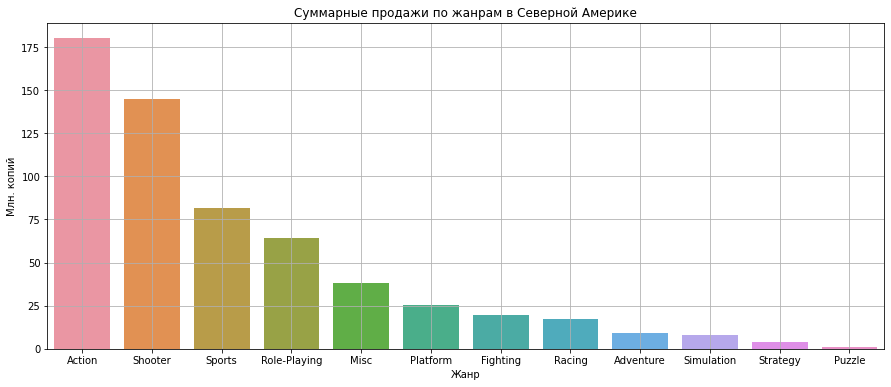

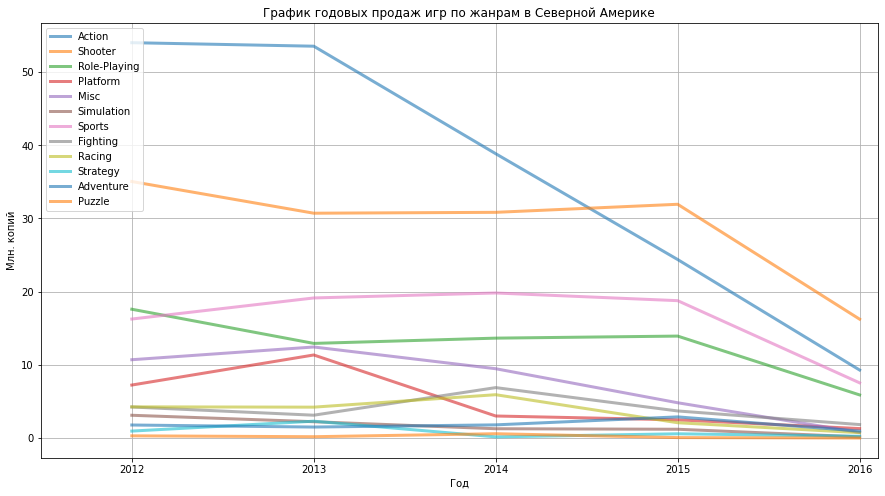

In [30]:
top_5('NA', 'genre')

В Северной Америке лидерами по продажам являются **Action**, **Shooter** и **Sports**  на 1, 2 и 3 местах соответственно. **Role-Playing** и **Misc** обосновались на 4 и 5 местах соответственно.

Итог: на 2017 наиболее перспективный жанр - **Action**. За ним идут **Shooter** и **Sports**.

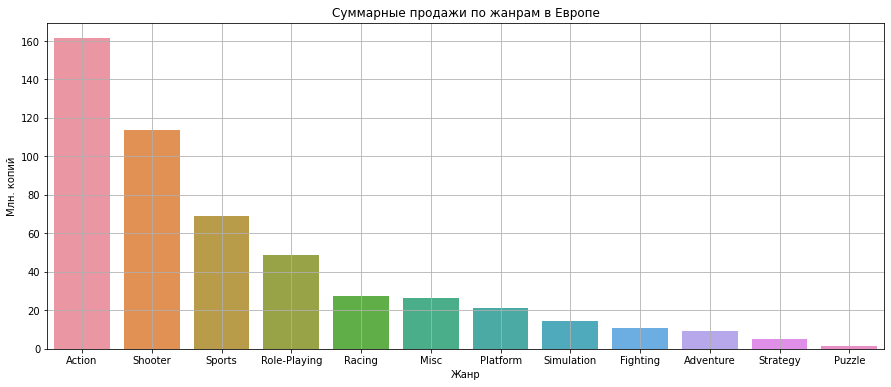

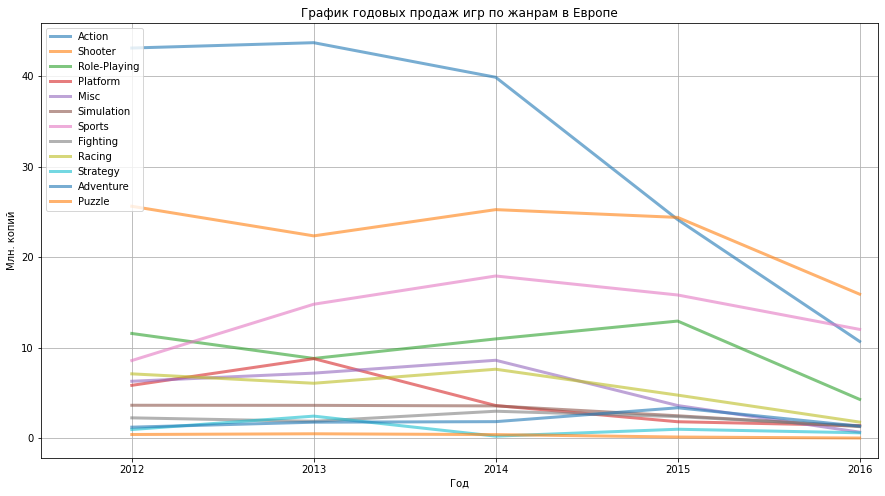

In [31]:
top_5('EU', 'genre')

В Европе лидерами по продажам являются **Action**, **Shooter** и **Sports**  на 1, 2 и 3 местах соответственно, что повторяет рейтинг популярности жанров в Северной Америке. На 4 месте - **Role-Playing**, на 5-м - **Racing**.

Топ-5 жанров в Северной Америке и Европе очень похож. Итог: самым перспективным на 2017 год является жанр **Shooter**. За ним следуют **Sports** и **Action**.

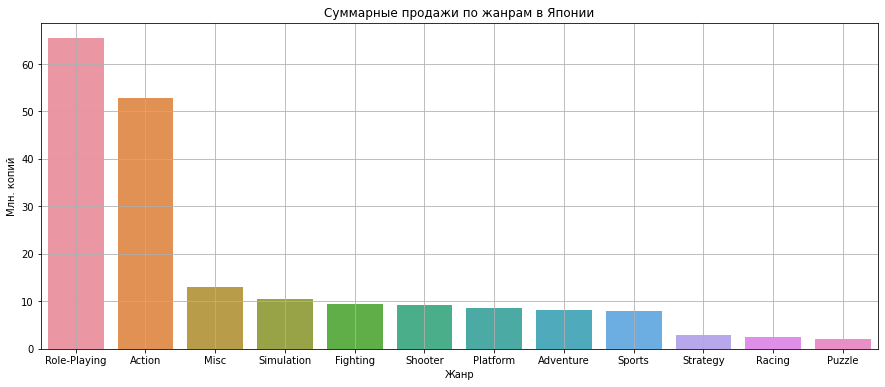

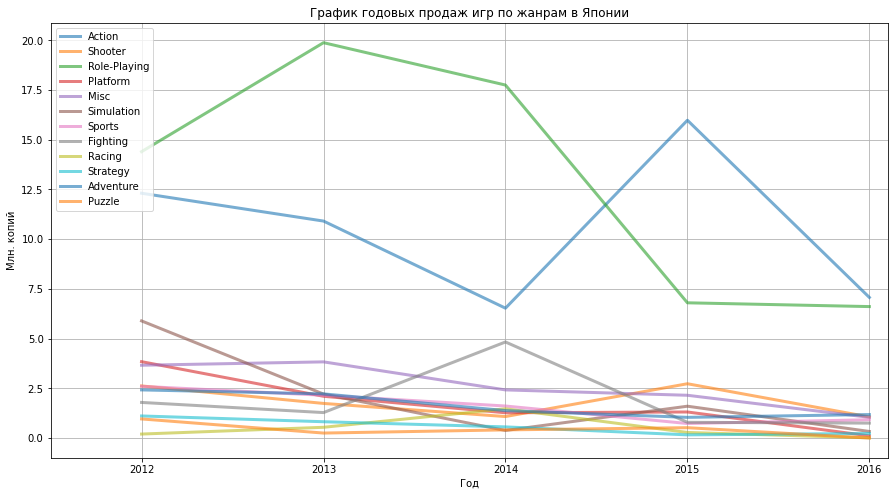

In [32]:
top_5('JP', 'genre')

В Японии рейтинг кардинально отличается от регионов Северной Америки и Европы. Здесь явным фаворитом является жанр **Role-Playing**, обгоняя жанр **Action** практически на 15%. Данные два жанра настолько популярны, что не имеет смысла выделять еще какие-то. К тому же следующие за лидерами жанры примерно равны по популярности. Скорее всего такая популярность именно этих жанров связана с распространением портативных консолей и культурными различиями между Западом и Востоком.

Итог: на 2017 год наиболее перспективным в Японии выглядит жанр **Role-Playing**, за ним идет **Action**. Такой порядок выбран из-за того, что последние годы жанр **Action** сильно теряет популярность в данном регионе.

* ### влияние рейтинга ESRB на продажи в отдельном регионе.

In [33]:
# Заменим пустые значения в столбце рейтинга на значение 'ND'(not determined - не определён)
data['rating'] = data['rating'].fillna('ND')

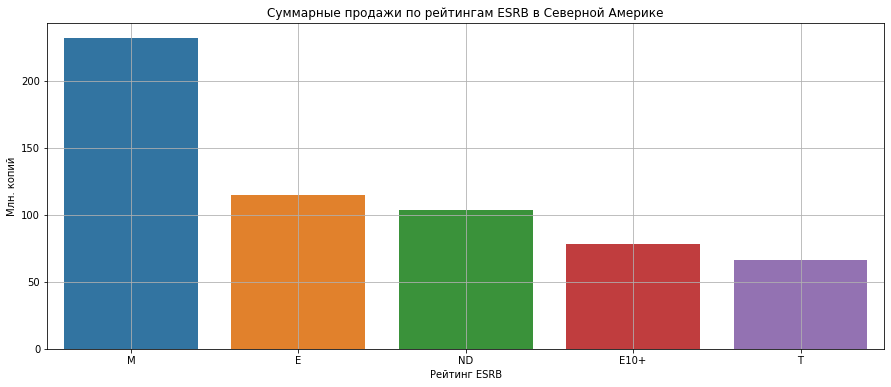

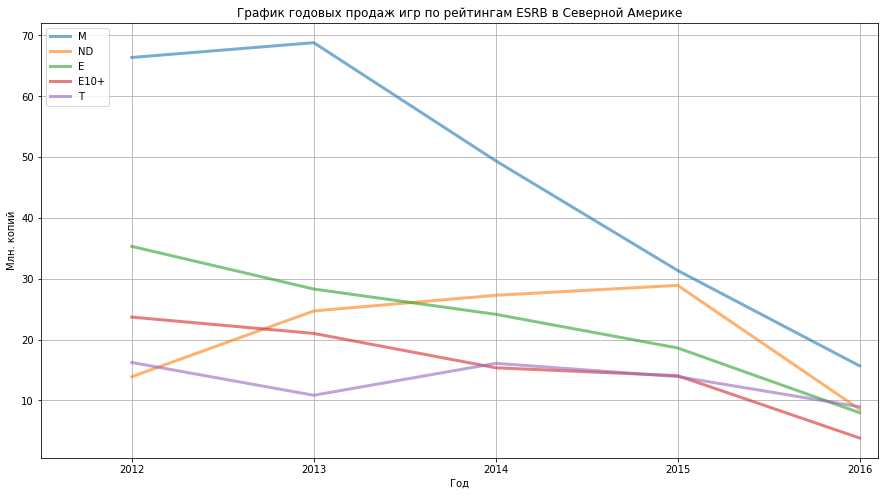

In [34]:
top_5('NA', 'rating')

Лидерами продаж в Северной Америке с большим являются игры с рейтингом **M**. Затем идут игры с рейтингами **T** и **ND**. Значение **ND** нами введено вместо пропусков и означает - *not determined(не определён)*.

Итог: наиболее перспективны в 2017 году будут игры с рейтингом **M**.

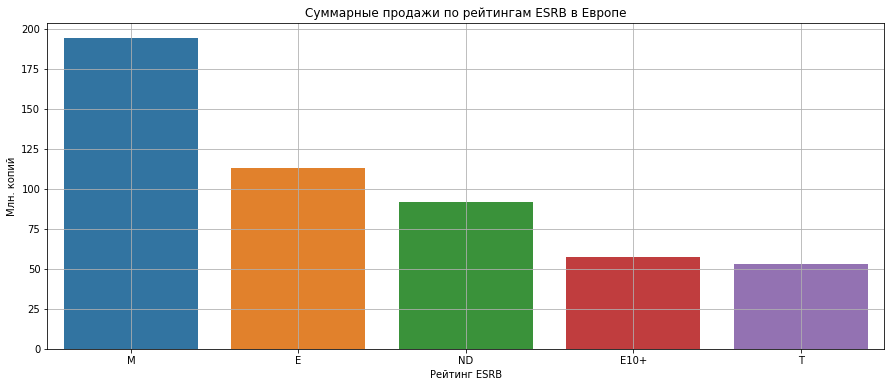

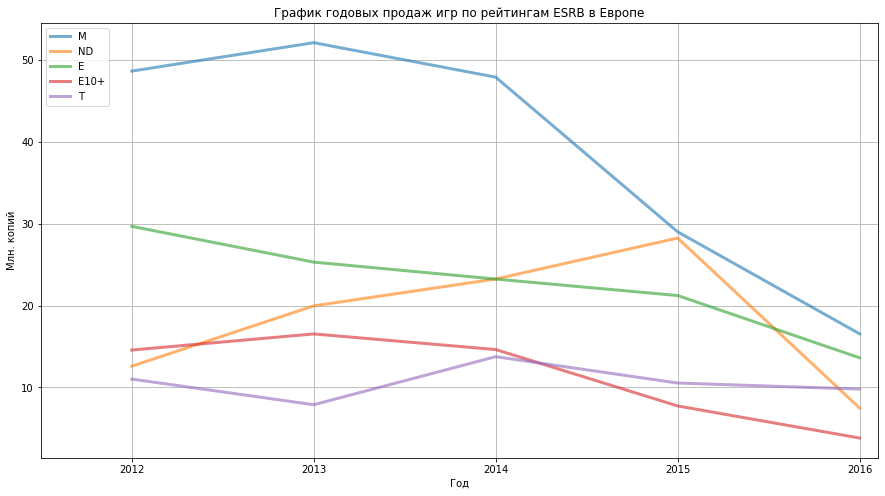

In [35]:
top_5('EU', 'rating')

В Европе топ-3 рейтингов самых продаваемых игр выглядит так: 1 место - **M**, 2 место - **E**, 3 место - **ND**.

Итог: перспективными на 2017 года выглядят игры с рейтингами **M** и **E**.

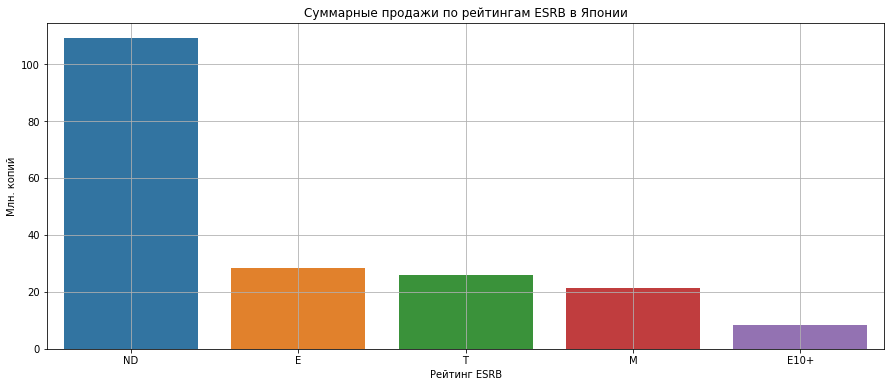

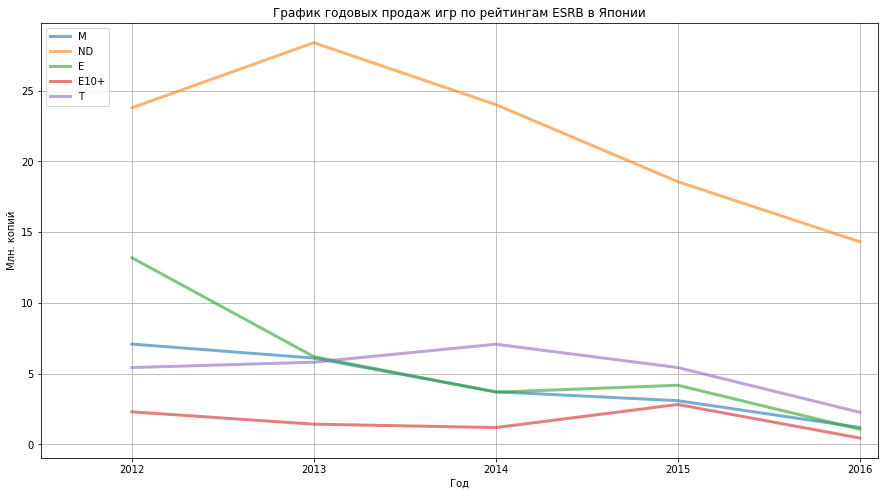

In [36]:
top_5('JP', 'rating')

В Японии большая часть рынка принадлежит играм, рейтинг которых мы определить не можем(**ND**). Игры с рейтингами **M**, **E** и **T** имеют примерно одинаковую долю на рынке, но слишком малую по сравнению с **ND**.

Итог: невозможно дать прогноз относительно перспективного рейтинга в Японии на 2017 год.

## Шаг 5. Проверка гипотез

### Гипотеза А: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза формулируется так: средние пользовательские рейтинги платформ **Xbox One** и **PC** равны. Тогда альтернативная гипотеза: средние пользовательские рейтинги платформ **Xbox One** и **PC** не равны.

In [37]:
alpha = 0.05
results = st.ttest_ind(data.query('platform == "xone" and user_score != "nan"')['user_score'], 
                       data.query('platform == "pc" and user_score != "nan"')['user_score'])
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
print('\n Средняя оценка пользователей на платформе Xbox One:', 
      round(data.query('platform == "xone" and user_score != "nan"')['user_score'].mean(), 3), '\n',
     'Средняя оценка пользователей на платформе PC:', 
      round(data.query('platform == "pc" and user_score != "nan"')['user_score'].mean(), 3))

p-значение: nan
Не получилось отвергнуть нулевую гипотезу

 Средняя оценка пользователей на платформе Xbox One: 6.521 
 Средняя оценка пользователей на платформе PC: 6.436


Так как не получилось отвергнуть нулевую гипотезу, которая говорила о равенстве средних пользовательские рейтингов платформ **Xbox One** и **PC**, то можно сказать, что данные рейтинги равны. Гипотеза А не отвергается.

### Гипотеза Б: Средние пользовательские рейтинги жанров Action и Sports разные

Нулевая гипотеза формулируется так: средние пользовательские рейтинги жанров **Action** и **Sports** равны. Тогда альтернативная гипотеза: средние пользовательские рейтинги жанров **Action** и **Sports** не равны.

In [38]:
alpha = 0.05
results = st.ttest_ind(data.query('genre == "Action" and user_score != "nan"')['user_score'], 
                       data.query('genre == "Sports" and user_score != "nan"')['user_score'])
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
print('\n Средняя оценка пользователей для игр жанра Action:', 
      round(data.query('genre == "Action" and user_score != "nan"')['user_score'].mean(), 3), '\n',
     'Средняя оценка пользователей для игр жанра Sports:', 
      round(data.query('genre == "Sports" and user_score != "nan"')['user_score'].mean(), 3))

p-значение: nan
Не получилось отвергнуть нулевую гипотезу

 Средняя оценка пользователей для игр жанра Action: 6.831 
 Средняя оценка пользователей для игр жанра Sports: 5.456


Так как нулевая гипотеза отвергнута, можно считать, что средние пользовательские рейтинги жанров **Action** и **Sports** не равны. Гипотеза Б не отвергается.

## Шаг 6. Общий вывод

Итак, для определения факторов, влияющих на успешность игры, были изучены данные из открытых источникам по играм раных платформ с 1980 года по настоящий момент (2016 г.).

После обработки данных, заполнению и удалению пропусков, приведению данных к определенному формату был проведен исследовательский анализ данных. Выяснилось, что количество выпускаемых игр начало увеличиваться только лишь с начала 90-х годов, достигнув пика в конце 2000-х (2008-2009гг). Затем резкое падение практически в 2 раза в с 2011 на 2012 год, после чего значение держится примерно на одном уровне.

Для выявления факторов, влияющих на успешность игры, необходимо проанализировать и успешность игровых платформ. А для этого нужно было понять, какова средняя продолжительность "жизни" платформы на рынке. Выяснилось, что она равна 10 годам. Поэтому далее можно было бы использовать данные только с 2007 по 2016 года. Однако принимая во внимание резкое изменение на рынке в количестве выпускаемых игр в 2012 году, возьмем для дальнейшего анализа период именно с 2012 года. Явными лидерами по продажам являются платформы **ps4**, **ps3**, **x360**, **3ds** и **xone**. Однако стоит отметить, что PS3 и X360 уже являются устаревшими платформами, продажи по которым уже сходят на нет(и заканчивается жизненный цикл) и которые уже получили обновление в виде PS4 и Xone. Поэтому самыми потенциально популярным платформами на 2017 год являются **ps4**, **xone** и **3ds**. 

Далее были рассмотрены оценки игр от критиков и пользователей и их корреляция с продажами игр по всему миру. Выяснилось, что оценки критиков связаны с количеством проданных игр, зависимость прямая, коэффициент корреляции в среднем равен 0,4. Зависимость же продаж от оценок пользователей отсутствует(очевидно из-за большой доли субъективности данных оценок), говорит об это и коэффициент корреляции, приблизительно равны 0.

Затем были рассмотрена популярность жанров. Рейтинг пятерки самых популярных выглядит следующим образом:
1. **Action**; 
2. **Shooter**; 
3. **Role-Playing**;
4. **Sports**; 
5. **Misc**. 

Причем **Action** обходит жанр **Shooter** практически на треть. В лидерах 2 жанра, которым свойственна динамика и активный геймплей. Так же этим жанрам свойственен низкий порог входа в игру, игровой процесс достаточно прост и интуитивно понятен игроку. Именно на эти свойства игр необходимо обратить внимание при выделении факторов, влияющих на успешность игры.

Затем была рассмотрена популярность платформ, жанров и рейтингов в Северной Америке, Европе и Японии:

* топ-5 платформ:
|  | Сев. Америка |      Европа     |Япония|
|-:|:-------: |:---------------:| :-------------:|
| 1 | **x360**      | **ps4** |    **3ds**  |
| 2 | **ps4**      | **ps4**        |  **ps3**        |
| 3 | **ps3**      | **x360** |    **psv**  |
| 4 | **xone**   | **xone** |   **ps4**   |
| 5 | **3ds** | **3ds**        |    **wiiu**     |

    **Итоги:**
      - Северная Америка: наиболее перспективными на 2017 год являются **ps4** и **xone**;
      - Европа: на 2017 год наиболее перспективна **ps4**, за ней, сильно отставая, - **xone**;
      - Япония: наиболее перспективными на 2017 год являются **3ds**, **ps4**, **psv**, именно в таком порядке по приоритетности.

* топ-5 жанров:
|  | Сев. Америка |      Европа     |Япония|
|-:|:-------: |:---------------:| :-------------:|
| 1 | **Action**      | **Action** |    **Role-Playing**  |
| 2 | **Shooter**      | **Shooter**        |  **Action**        |
| 3 | **Sports**      | **Sports** |    **Misc**  |
| 4 | **Role-Playing**   | **Role-Playing** | **Simulation**  |
| 5 | **Misc** | **Racing**        | **Fighting** |

    **Итоги:**
      - Северная Америка: на 2017 наиболее перспективный жанр - **Action**, за ним идут **Shooter** и **Sports**;
      - Европа: самым перспективным на 2017 год является жанр **Shooter**, за ним следуют **Sports** и **Action**;
      - Япония: на 2017 год наиболее перспективным выглядит жанр **Role-Playing**, за ним идет **Action** - такой порядок выбран из-за того, что последние годы жанр **Action** сильно теряет популярность в данном регионе.


* топ-3 рейтингов ESRB:
|  | Сев. Америка |      Европа     |Япония| 
|:-:|:-------: |:---------------:| :-------------:| 
| 1 | **M**      | **M** |    **ND**  | 
| 2 | **T**      | **E**        |  **M**        | 
| 3 | **ND**      | **ND** |    **E**  | 

    **Итоги:**
      - Северная Америка: наиболее перспективны в 2017 году будут игры с рейтингом **M**;
      - Европа: перспективными на 2017 года выглядят игры с рейтингами **M** и **E**;
      - Япония: невозможно дать прогноз относительно перспективного рейтинга на 2017 год.

Подводя итог можно сказать, что наиболее успешными и продаваемыми играми в 2017 скорее всего станут игры для платформ **ps4**, **xone** и **3ds** в жанрах **Action** и **Shooter** у которых будут высокие оценки критиков и рейтинг **M**.

|#| **Проект**       |**Задача проекта**          |**Используемые библиотеки** |
|:-:|:----------------:|:--------------------------:|:--------------------------:|
|1| <a href='https://github.com/AxelVas/Borrower_reliability_research'> Исследование надёжности заёмщиков — анализ банковских данных  </a>  | На основе статистики о платёжеспособности клиентов исследовать влияет ли семейное положение и количество детей клиента на факт возврата кредита в срок | предобработка данных, Python, Pandas, PyMystem3, лемматизация, SciPy, Matplotlib, Seaborn, SciKitLearn, Numpy|
|2| <a href='https://github.com/AxelVas/Sales_planning_comp.games_online_store'> Изучение закономерностей, определяющих успешность игр  </a>  | Используя исторические данные о продажах компьютерных игр, оценки пользователей и экспертов, жанры и платформы, выявить закономерности, определяющие успешность игры | Python, Pandas, numpy, Matplotlib, предобработка данных, исследовательский анализ данных, описательная статистика, проверка статистических гипотез, Seaborn, SciPy |     
|3| <a href='https://github.com/AxelVas/Research_of_ads_for_the_sale_of_apartments'> Продажа квартир в Санкт-Петербурге — анализ рынка недвижимости </a>  | Используя данные сервиса Яндекс.Недвижимость, определить рыночную стоимость объектов недвижимости и типичные параметры квартир     | Python, Pandas, Matplotlib, исследовательский анализ данных, визуализация данных, предобработка данных, math |
|4| <a href='https://github.com/AxelVas/Determine_the_preferences_of_F9_airline_users'> Исследование данных авиакомпании — проверить гипотезу о повышении спроса во время фестивалей </a> | Произвести выгрузки и подготовку данных авиакомпаний с помощью SQL, проверить гипотезу о различии среднего спроса на билеты во время различных событий      |  SQL, Python, Pandas, Matplotlib, SciPy, проверка статистических гипотез|
|5| <a href='https://github.com/AxelVas/Determine_where_to_drill_a_new_well.'> Выбор региона для разработки новых нефтяных месторождений </a> |Решить в каком регионе добывать нефть. Построить модель машинного обучения, которая поможет определить регион, где добыча принесет наибольшую прибыль с наименьшим риском убытков.   | Pandas, sklearn, math, numpy, Seaborn, Matplotlib, SciPy, Bootstrap, машинное обучение|
|6| <a href='https://github.com/AxelVas/Forecasting_customer_churn_for_a_bank'> Отток клиентов банка | Анализ оттока клиентов из банка для выбор стратегии (удержание старых клиентов или привлечение новых клиентов) </a>  | Pandas, Matplotlib, Seaborn, numpy, sklearn, math, машинное обучение |
|7| <a href='https://github.com/AxelVas/Predict_the_recovery_rate_of_gold_from_gold_ore'> Подготовка прототипа модели для металлообрабатывающего предприятия </a> | Pазработка модели, предсказывающей коэффициент восстановления золота из золотосодержащей руды   | Pandas,sklearn, numpy, Seaborn, Matplotlib, math, машинное обучение |
|8| <a href='https://github.com/AxelVas/Protect_customer_data_company_Though_the_Flood'> Разработка алгоритма для защиты данных </a>  | Методом преобразования данных защитить личную информацию клиентов страховой компании.     | Pandas, Seaborn, numpy, sklearn, машинное обучение|
|9| <a href='https://github.com/AxelVas/Model_for_car_service'> Предсказание цены автомобиля </a>  | Обучить модель для определения рыночной стоимости автомобиля.   |  Pandas, sklearn, numpy, LightGBM, машинное обучение, CatBoost |
|10| <a href='https://github.com/AxelVas/Taxi_demand_forecast'> Прогнозирование заказов такси </a>  | Обучить модель для предсказания количества заказов такси на следующий час.     | Pandas, sklearn, numpy, LightGBM, Matplotlib, StatsModels, CatBoost, машинное обучение|
|11| <a href='https://github.com/AxelVas/Wikishop_project_working_with_text'> Классификация комментариев </a> | Ускорить модерацию комментариев в сообществе, автоматизировав оценку их токсичности. Обучить модель классифицировать комментарии на позитивные и негативные.    | Pandas, sklearn, numpy, NLTK, LightGBM, CatBoost, машинное обучение |
|12| <a href='https://github.com/AxelVas/Determining_the_age_of_buyers'> Определение возраста по фото </a>  | Построить модель, которая по фотографии определит приблизительный возраст человека. Есть набор фотографий людей с указанием возраста. | Pandas, keras, Matplotlib, Seaborn, kомпьютерное зрение, машинное обучение |
|13| <a href='https://github.com/AxelVas/Determination_of_a_promising_tariff'> Определение выгодного тарифа для телеком компании </a> | На основе данных клиентов оператора сотовой связи проанализировать поведение клиентов и поиск оптимального тарифа   | Python, Pandas, Matplotlib, numpy, SciPy, описательная статистика, проверка статистических гипотез, math, Seaborn, sklearn, машинное обучение |  